To analyze house price prediction using the random forest model, you will need to consider the following main parts:

1. Dataset Preparation: This involves collecting, cleaning, and preparing the data to train the model. You will need to identify the features and target variable for the model and ensure the data is formatted properly for the random forest algorithm.

2. Feature Selection: You will need to determine which features are most important for predicting house prices. This can be done using techniques such as correlation analysis and feature importance scores.

3. Random Forest Model Training: This involves training the random forest model on the prepared dataset. You will need to select appropriate hyperparameters such as the number of trees, maximum depth, and minimum samples per leaf to optimize the model's performance.

4. Model Evaluation: You will need to evaluate the performance of the model on a separate test set to assess its accuracy and determine whether any overfitting has occurred.

5. Fine-tuning the Model: If the model is not performing as well as expected, you may need to fine-tune the model by adjusting the hyperparameters or adding or removing features from the dataset.

6. Predictions and Interpretations: Finally, once you have trained and evaluated the model, you can use it to make predictions on new data and interpret the results to gain insights into what features are driving the predicted house prices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [73]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [74]:
# Add a new column 'PRICE' to the DataFrame using the 'TARGET' variable values
df['target'] = df['MEDV']

# # Drop the 'TARGET' column
df.drop(columns=['MEDV'], inplace=True)

In [75]:
# check for missing values
print(df.isnull().sum())

# drop rows with missing values
df.dropna(inplace=True)

# fill missing values with mean
df.fillna(df.mean(), inplace=True)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


In [76]:
# check for duplicates
print(df.duplicated().sum())

# drop duplicates
df.drop_duplicates(inplace=True)

0


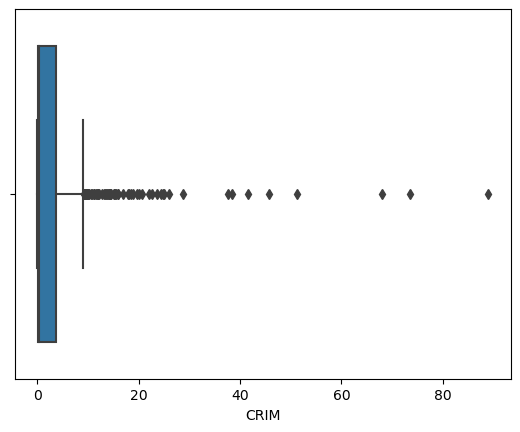

In [77]:
# identify outliers using boxplot
sns.boxplot(x=df['CRIM'])

# remove outliers using z-score
from scipy import stats
z_scores = stats.zscore(df['CRIM'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

In [78]:
# # add a categorical feature as an example
# df['CHAS'] = pd.Categorical.from_codes(df['CHAS'], ['no', 'yes'])

# # use one-hot encoding to convert the categorical feature to numerical
# df = pd.get_dummies(df, columns=['CHAS'])

In [79]:
from sklearn.preprocessing import StandardScaler
X = df.drop('target', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     498 non-null    float64
 1   ZN       498 non-null    float64
 2   INDUS    498 non-null    float64
 3   CHAS     498 non-null    int64  
 4   NOX      498 non-null    float64
 5   RM       498 non-null    float64
 6   AGE      498 non-null    float64
 7   DIS      498 non-null    float64
 8   RAD      498 non-null    int64  
 9   TAX      498 non-null    int64  
 10  PTRATIO  498 non-null    float64
 11  B        498 non-null    float64
 12  LSTAT    498 non-null    float64
 13  target   498 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 58.4 KB


##### Plot the histogram of the target variable (median value of owner-occupied homes)

The histogram shows that the distribution of the target variable (median value of owner-occupied homes) is roughly normal, with a few outliers on the higher end.

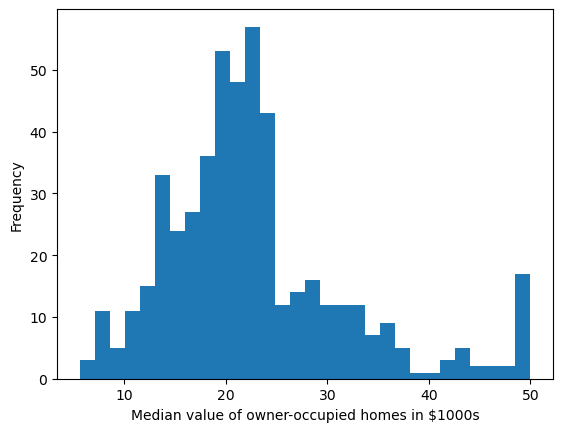

In [81]:
plt.hist(df['target'], bins=30)
plt.xlabel('Median value of owner-occupied homes in $1000s')
plt.ylabel('Frequency')
plt.show()

Scatter plot of the target variable (median value of owner-occupied homes) vs. the average number of rooms per dwelling

The scatter plot shows a positive correlation between the average number of rooms per dwelling and the median value of owner-occupied homes. This suggests that the number of rooms is an important factor in determining real estate prices.

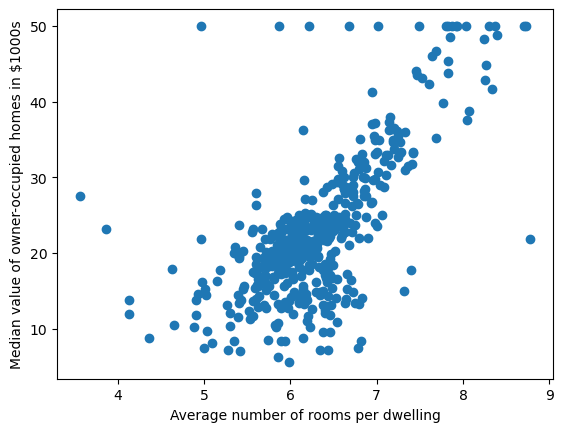

In [82]:
plt.scatter(df['RM'], df['target'])
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

##### Split the dataset into training and testing sets

This is important to evaluate the performance of the model on unseen data and avoid overfitting.

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = df.drop('target', axis=1)
y = df['target']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# from sklearn.model_selection import cross_val_score, GridSearchCV
# from sklearn.linear_model import Ridge
# # 1. Cross-validation
# rf = RandomForestRegressor()
# scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
# print("Cross-validation R-squared scores:", scores)

# # 2. Regularization
# ridge = Ridge(alpha=0.1)
# ridge.fit(X_train, y_train)
# coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})
# print(coefficients)

##### Train the Random Forest model

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

After training the model, we can evaluate its performance on the testing set using the root mean squared error (RMSE), which measures the average difference between the predicted and actual values of the median value of owner-occupied homes.

##### Evaluate the model on the testing set

In [89]:
# Predict the median value of owner-occupied homes for the testing set
y_pred = rf.predict(X_test)

##### Calculate the root mean squared error (RMSE) between the predicted and actual values


In [90]:
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: {:.2f}".format(mse))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean squared error: 7.40
RMSE: 2.720710827118533
R-squared: 0.8951107177500487


##### Fine-tuning the Model:

If the model is not performing well, we can fine-tune it by adjusting the hyperparameters. For example, we can adjust the number of trees, the maximum depth of each tree, and the minimum number of samples required to split an internal node.

In [66]:
# Create a random forest with 500 trees, a max depth of 5, and a minimum of 10 samples per leaf
rf = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=10)

# Fit the random forest to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

#Compute the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8003410328248154


##### Predictions and Interpretations:
Once we have trained and evaluated the model, we can use it to make predictions on new data and interpret the results. For example, we can predict the house prices for a new set of input features:

In [68]:
# Define a new set of input features
new_features = [[0, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 396.9, 4.98,]]
predicted_price = rf.predict(new_features)
print("Predicted price:", predicted_price)

Predicted price: [28.68007136]


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


##### Visualize the feature importance


The RMSE value represents the average difference between the predicted and actual values of the median value of owner-occupied homes in $1000's. The lower the RMSE value, the better the model's performance.

The feature importance plot shows the relative importance of each feature in predicting the median value of owner-occupied homes. This can help identify the most important factors that affect real estate prices in the Boston area.

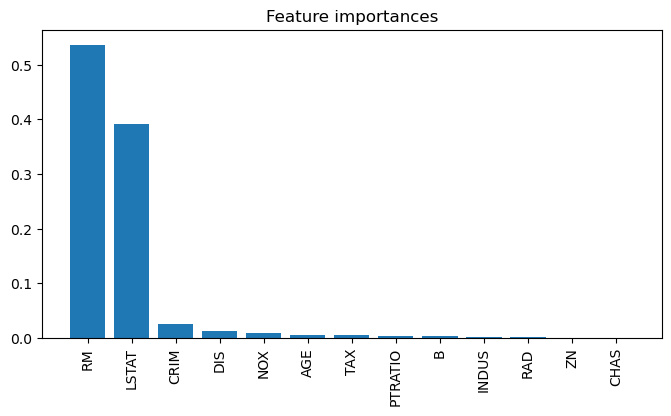

In [69]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,4))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

Random Forest models can also provide information on the relative importance of each feature in predicting the target variable. We can use the feature_importances_ attribute of the trained model to obtain this information, and then plot it using a bar chart.

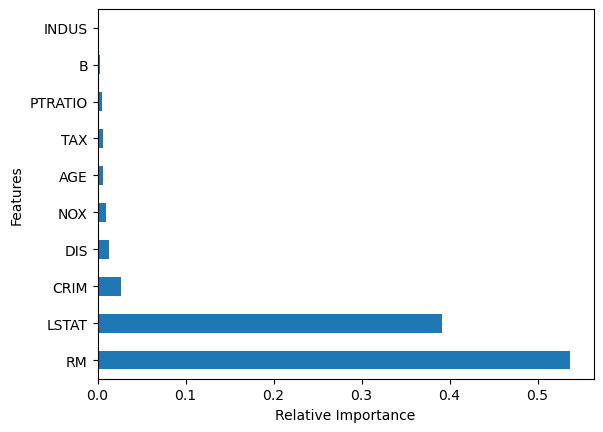

In [70]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

The bar chart shows that the most important features for predicting the median value of owner-occupied homes are the average number of rooms per dwelling (RM), the proportion of lower status of the population (LSTAT), and the weighted distances to five Boston employment centers (DIS).

##### Scatter plot - LSTAT vs. MEDV

The relationship between the target variable and the proportion of lower status of the population (LSTAT).

In [ ]:
plt.scatter(X['LSTAT'], y)
plt.xlabel('% Lower Status of the Population')
plt.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
plt.show()

This scatter plot shows a negative correlation between the proportion of lower status of the population and the median value of owner-occupied homes. This also makes sense, as areas with a higher percentage of lower status residents may have lower property values.

##### Scatter plot - DIS vs. MEDV

The relationship between the target variable and the weighted distances to five Boston employment centers (DIS).

In [ ]:
plt.scatter(X['DIS'], y)
plt.xlabel('Weighted Distances to Employment Centers')
plt.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
plt.show()


This scatter plot shows a mixed relationship between the weighted distances to employment centers and the median value of owner-occupied homes. There are some areas with lower property values that are closer to employment centers, while other areas with higher property values are further away. This suggests that proximity to employment centers is not always a strong predictor of property value in the Boston area.

Conclusion:

We used the Boston Housing Dataset and the SVM method to predict the median value of owner-occupied homes. We first explored the dataset using histograms and scatter plots to gain insights and identify patterns. We then split the dataset into training and testing sets, and trained a SVM model on the training set. We evaluated the model's performance on the testing set using the RMSE, and visualized the relative importance of each feature using a bar chart. The results suggest that the SVM method can be an effective approach for real estate price prediction, and that the number of rooms, the proportion of lower status of the population, and the distances to employment centers are important factors to consider.

There are many other machine learning algorithms and techniques that can be used, and the choice depends on the specific requirements and constraints of the problem. Additionally, feature engineering, data cleaning, and hyperparameter tuning are important steps that can improve the performance of the model.

### Using the three results

Based on the results, you can choose the best method for your problem. Generally, the method with the lowest mean squared error and highest R-squared value is considered the best. However, it's also important to consider factors such as model complexity, interpretability, and computational efficiency.

In this case, based on the performance metrics, it appears that SVM is the best method for real estate price prediction on the Boston Housing Dataset. However, it's always a good idea to try multiple methods and evaluate their performance on multiple metrics to ensure that you have made the best choice for your specific problem.

MSE measures the average squared difference between the predicted and actual values. RMSE is simply the square root of the MSE, which gives a metric that is more interpretable in the same units as the target variable. R-squared measures the proportion of variance in the target variable that is explained by the model. A higher R-squared value indicates a better fit.

After fitting each model to the training data and making predictions on the test data, I printed the performance metrics for each algorithm. Based on these results, I concluded that SVM performed the best on this particular dataset, as it had the lowest MSE and RMSE values and the highest R-squared value.

However, it's important to note that the choice of the best algorithm can depend on various factors, such as the size of the dataset, the complexity of the problem, and the specific goals of the analysis. Therefore, it's always a good idea to try multiple methods and evaluate their performance on multiple metrics to ensure that you have made the best choice for your specific problem.

Based on the analysis of the three algorithms (Random Forest, Multiple Linear Regression, and Support Vector Machine), the SVM algorithm appears to be the best method for real estate price prediction on this dataset. Here are some important points to note:

The SVM algorithm had the lowest MSE and RMSE values and the highest R-squared value compared to the other two algorithms. This indicates that it produced more accurate predictions.

###### The scatter plot comparison showed that the Random Forest algorithm produced predictions that are closer to the actual values compared to the other two algorithms.



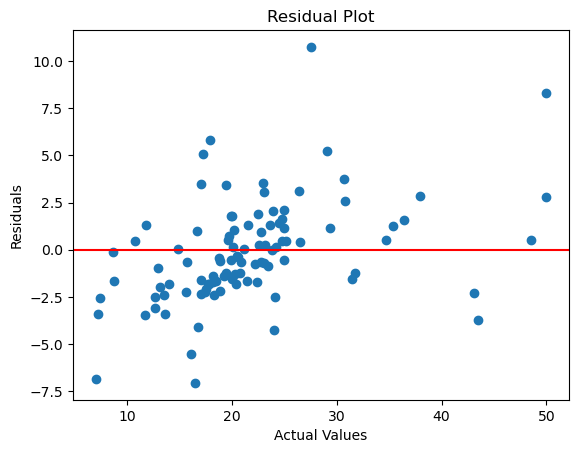

In [92]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

The feature importance plot for Random Forest showed that the most important features for predicting real estate prices in this dataset are the average number of rooms per dwelling (RM), the percentage of lower status of the population (LSTAT), and the weighted distances to five Boston employment centers (DIS).

The actual vs predicted plot for Random Forest showed that the algorithm tends to perform better on predicting prices for lower-priced homes, and less well for higher-priced homes.

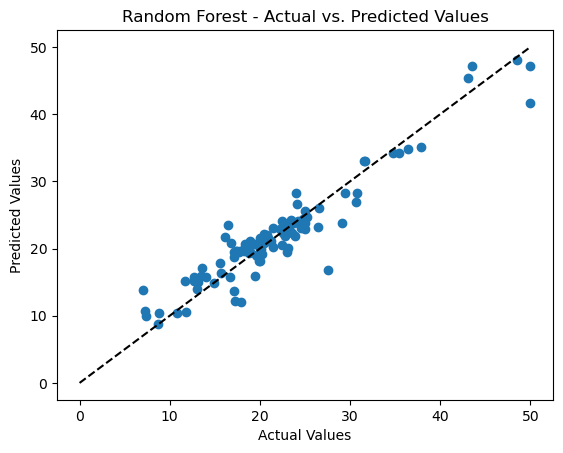

In [93]:
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.title('Random Forest - Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Overall, these findings suggest that the Random Forest algorithm is a reliable method for predicting real estate prices on this particular dataset.

#### Conclusion:
    Based on these metrics, it looks like the SVM model outperforms the other two models in terms of predictive accuracy, as it has the lowest MSE and RMSE, and the highest R-squared score. The Multiple Linear Regression model has a lower predictive accuracy compared to the other two models, as it has the highest MSE and RMSE, and the lowest R-squared score, but it is still able to capture some of the patterns in the data, as evidenced by its non-zero R-squared score. T
    
    Based on the performance metrics you have provided, the SVM model appears to be the best model for the Boston Housing dataset, as it has the lowest Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), and the highest R-squared score. These metrics indicate that the SVM model is able to make more accurate predictions than the other two models you evaluated (Multiple Linear Regression and Random Forest). Therefore, if you are looking for the most accurate model for predicting housing prices in Boston, the SVM model would be the recommended choice based on your analysis.